In [76]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes

In [77]:
df = pd.read_csv('telco_data_clean.csv', index_col=False)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,monthly_charges_cat,tenure_year
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low Expense,1
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Medium Expense,3
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Medium Expense,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Medium Expense,4
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Medium High Expense,1


In [78]:
dfnew = df.loc[(df['churn']=='Yes')]
dfnew.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,monthly_charges_cat,tenure_year
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Medium Expense,1
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Medium High Expense,1
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,High Expense,1
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,High Expense,3
13,Male,No,No,No,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,High Expense,5


In [79]:
dfnew.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn',
       'monthly_charges_cat', 'tenure_year'],
      dtype='object')

In [80]:
for x in df.columns:
    contingency_table4 = pd.crosstab(df[x],df['churn'])
    print(f'column {x} {stats.chi2_contingency(contingency_table4).pvalue}')

column gender 0.4904884707065509
column senior_citizen 2.4792557203954705e-36
column partner 3.97379757451591e-36
column dependents 2.0196592017051303e-42
column tenure 3.471813048469505e-176
column phone_service 0.34992398942431924
column multiple_lines 0.0035679273999811405
column internet_service 5.831198962237274e-159
column online_security 1.4006867477839222e-184
column online_backup 7.776099238804965e-131
column device_protection 1.9593887862403176e-121
column tech_support 7.407807748843711e-180
column streaming_tv 1.324641113169159e-81
column streaming_movies 5.353560421401324e-82
column contract 7.326182186265472e-257
column paperless_billing 8.236203353962564e-58
column payment_method 1.4263098511063342e-139
column monthly_charges 2.9951566174415275e-18
column total_charges 0.5858750101997261
column churn 0.0
column monthly_charges_cat 7.984983286537826e-73
column tenure_year 2.358395063933462e-188


In [81]:
columns = ['senior_citizen','partner','dependents', 'internet_service',
        'online_security','online_backup','device_protection','tech_support',
        'streaming_tv', 'streaming_movies', 'contract',
        'paperless_billing', 'payment_method', 'monthly_charges', 'churn', 'tenure_year']
dfnew = dfnew.drop(columns=[col for col in dfnew if col not in columns])
dfnew.columns

Index(['senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'churn', 'tenure_year'],
      dtype='object')

In [82]:
new_num = ['tenure_year', 'monthly_charges']
new_cat = ['senior_citizen', 'partner', 'dependents', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 
       'contract', 'paperless_billing', 'payment_method', 'churn']

In [83]:
for x in new_num:
    print(x, 'skewness is', dfnew[x].skew())

tenure_year skewness is 1.257764818916334
monthly_charges skewness is -0.7293738092658485


In [84]:
scaler = StandardScaler()
dfnew_scaled = scaler.fit_transform(dfnew[new_num])

In [87]:
dfnew_final = np.concatenate([dfnew_scaled, dfnew[new_cat]], axis=1)
dfnew_final = pd.DataFrame(dfnew_final, columns=['tenure_year', 'monthly_charges'] + new_cat)
dfnew_final = dfnew_final.infer_objects()
dfnew_final

,tenure_year,monthly_charges,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
0,-0.713313,-0.835028,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
1,-0.713313,-0.151720,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
2,-0.713313,1.022272,No,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
3,0.597584,1.231117,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
4,1.908480,1.186509,No,No,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,-0.713313,-0.593741,No,No,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,Yes
1865,-0.713313,-1.226359,No,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),Yes
1866,-0.713313,0.053070,Yes,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
1867,2.563928,1.156095,No,No,No,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),Yes


In [88]:
index_cat_columns = [dfnew_final.columns.get_loc(col) for col in new_cat]

print('Categorical columns        : ', new_cat)
print('Categorical columns index  : ', index_cat_columns)

Categorical columns        :  ['senior_citizen', 'partner', 'dependents', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'churn']
Categorical columns index  :  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


Cluster creation :  2
Cluster creation :  3
Cluster creation :  4
Cluster creation :  5
Cluster creation :  6


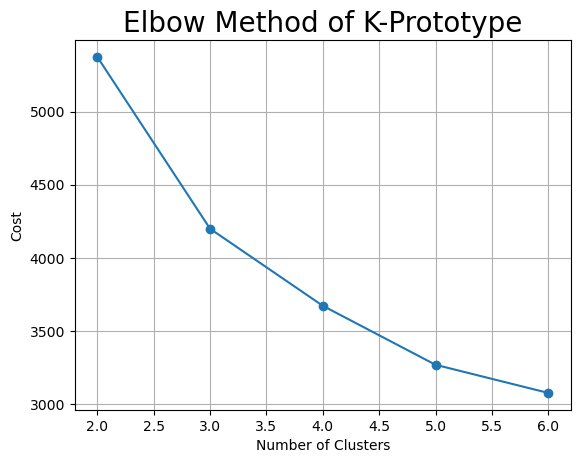

In [89]:
max_clusters = 6
cost = []
for k in range(2, max_clusters+1):
  kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42, n_jobs=-1)
  kproto.fit_predict(dfnew_final, categorical=index_cat_columns)
  cost.append(kproto.cost_)
  print('Cluster creation : ', k)

plt.plot(range(2, max_clusters+1), cost, marker ="o")
plt.grid()
plt.title('Elbow Method of K-Prototype', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

In [90]:
kp = KPrototypes(n_clusters=3, random_state=42)
pred = kp.fit_predict(dfnew_final, categorical=index_cat_columns)
pred

array([2, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [91]:
dfnew['cluster'] = pred
dfnew

,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn,tenure_year,cluster
2,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,1,2
4,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,1,0
5,No,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,Yes,1,0
8,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,Yes,3,1
13,No,No,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,Yes,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,No,No,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,Yes,1,2
7015,No,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,Yes,1,2
7021,Yes,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,Yes,1,0
7023,No,No,No,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,Yes,6,1


In [92]:
dfnew[dfnew['cluster']==0].describe()

,monthly_charges,tenure_year,cluster
count,968.000000,968.000000,968.0
mean,83.564153,1.404959,0.0
std,10.236145,0.660024,0.0
min,65.000000,1.000000,0.0
25%,74.900000,1.000000,0.0
50%,82.150000,1.000000,0.0
75%,90.862500,2.000000,0.0
max,112.950000,4.000000,0.0


In [93]:
dfnew[dfnew['cluster']==1].describe()

,monthly_charges,tenure_year,cluster
count,416.000000,416.000000,416.0
mean,94.278245,4.485577,1.0
std,15.335333,1.099741,0.0
min,19.400000,2.000000,1.0
25%,87.437500,4.000000,1.0
50%,99.175000,4.000000,1.0
75%,104.700000,5.000000,1.0
max,118.350000,6.000000,1.0


In [94]:
dfnew[dfnew['cluster']==2].describe()

,monthly_charges,tenure_year,cluster
count,485.000000,485.000000,485.0
mean,39.218557,1.395876,2.0
std,13.759140,0.852793,0.0
min,18.850000,1.000000,2.0
25%,24.800000,1.000000,2.0
50%,44.350000,1.000000,2.0
75%,50.400000,1.000000,2.0
max,64.700000,5.000000,2.0
